In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import robin_stocks as r 
from datetime import datetime
from dateutil import tz
from_zone = tz.tzutc()
to_zone = tz.tzlocal()
def utcToLocal(strDate):
    utc = datetime.strptime(strDate, '%Y-%m-%dT%H:%M:%SZ')
    utc = utc.replace(tzinfo=from_zone)
    return utc.astimezone(to_zone)

import configparser
config = configparser.RawConfigParser()
configFilePath = '/Users/philipmassey/.tokens/robinhood.cfg'
config.read(configFilePath)
rhuser = config.get('login', 'user')
rhpwd = config.get('login', 'pwd')
login = r.login(rhuser,rhpwd)

#!!! fill out the specific option information
symbol = 'SDGR'
expirationDate = '2020-05-15'
strike = 55.0
optionType = 'call'
span = 'week' #available options are day,week,year, and 5year
#!!!

historicalData = r.get_option_historicals(symbol,expirationDate,strike,optionType,span)
data_points = historicalData['data_points']
df = pd.DataFrame(data_points)
print(len(df))
local = utcToLocal(df.iloc[-1:].begins_at.values[-1])
print('local.  ', local)
df[['close_price', 'high_price','low_price', 'open_price','volume']] = df[['close_price', 'high_price','low_price', 'open_price','volume']].apply(pd.to_numeric)
df[['begins_at']] = df[['begins_at']].apply(pd.to_datetime)
df.set_index('begins_at',inplace=True)
df.tail()

191
local.   2020-05-12 12:10:00-07:00


,close_price,high_price,interpolated,low_price,open_price,session,volume
begins_at,,,,,,,
2020-05-12 18:30:00+00:00,5.10,5.25,False,5.05,5.05,reg,0
2020-05-12 18:40:00+00:00,5.65,5.70,False,5.10,5.25,reg,0
2020-05-12 18:50:00+00:00,6.15,6.15,False,5.65,5.65,reg,0
2020-05-12 19:00:00+00:00,6.35,6.75,False,5.95,6.15,reg,0
2020-05-12 19:10:00+00:00,5.60,6.35,False,5.50,6.35,reg,0


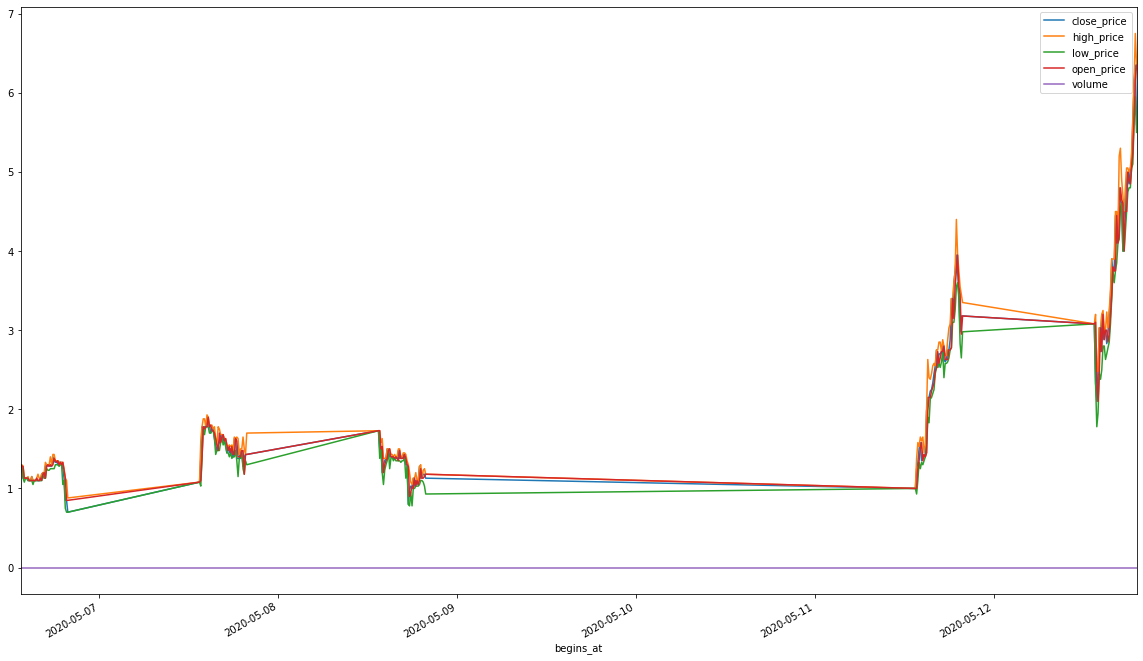

In [35]:

#df.plot(x ='begins_at', y='open_price', kind = 'scatter')
df.plot(figsize=(20, 12))
#df.plot()
plt.show()
